{1: 11, 2: 13, 3: 21, 4: 32, 5: 48, 6: 71, 7: 112, 8: 151, 9: 226, 10: 393, 11: 572, 12: 840, 13: 1249, 14: 1928, 15: 3084, 16: 4423, 17: 6707, 18: 10432, 19: 15492, 20: 24053, 21: 36192, 22: 54707, 23: 83905, 24: 125396, 25: 193899, 0: 8}


<function matplotlib.pyplot.show(close=None, block=None)>

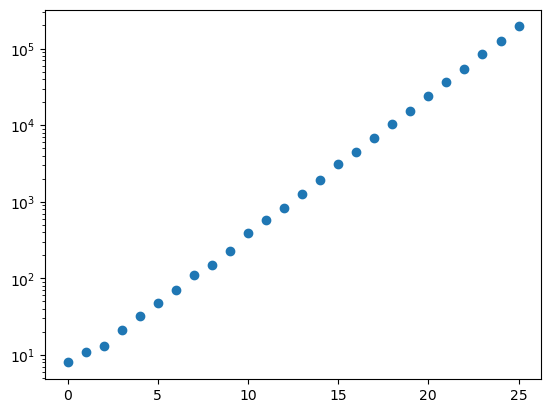

In [39]:
import matplotlib.pyplot as plt

input = '0 89741 316108 7641 756 9 7832357 91'
lst_input = [int(x) for x in input.split()]
len_for_count ={}
dico_cache = {}

def modif_stones(lst, number, count):
    if count < number:
        new_lst = []
        for item in lst:
            if item in dico_cache.keys():
                if isinstance(dico_cache[item], list):
                    new_lst.extend(dico_cache[item])
                else:
                    new_lst.append(dico_cache[item])
            elif item == 0:
                new_lst.append(1)
                dico_cache[item] = 1
            elif len(str(item))%2 == 0:
                item = str(item)
                mid = int(len(item) / 2)
                new_lst.append(int(item[:mid]))
                new_lst.append(int(item[mid:]))
                dico_cache[item] = [int(item[:mid]),int(item[mid:])]
            elif len(str(item))%2 != 0:
                new_lst.append(item*2024)
                dico_cache[item] = item*2024
        count += 1
        len_for_count[count] = len(new_lst)
        return modif_stones(new_lst, number, count)
    else:
        return lst

first = modif_stones(lst_input, 25, 0)


len_for_count[0] = len(lst_input)


print(len_for_count)

plt.scatter(len_for_count.keys(), len_for_count.values())
plt.yscale('log')
plt.show

In [40]:
from scipy.stats import linregress
import numpy as np

x = list(len_for_count.keys())
y = list(len_for_count.values())
transform_log = lambda x:np.log(x) if x != 0 else 0
y_log = []
for i in y:
    y_log.append(transform_log(i))
result = linregress(x, y_log)

result

LinregressResult(slope=0.4112375495611169, intercept=1.8395199642359277, rvalue=0.9997278860115246, pvalue=1.0866312632029336e-40, stderr=0.0019586923219673223, intercept_stderr=0.028552601765485748)

In [41]:
a = 0.43
b = 1

res = np.exp(result.slope*75+result.intercept)
res


156227779201231.66

In [17]:
input = '0 89741 316108 7641 756 9 7832357 91'
lst_input = [int(x) for x in input.split()]
len_for_count ={}
dico_cache = {}

def modif_stones2(lst, number, count):
    while count < number:
        print(count)
        if count == 0:
            for item in lst:
                if item in dico_cache.keys():
                    pass
                elif item == 0:
                    dico_cache[item] = 1
                elif len(str(item))%2 == 0:
                    item = str(item)
                    mid = int(len(item) / 2)
                    dico_cache[item] = [int(item[:mid]),int(item[mid:])]
                elif len(str(item))%2 != 0:
                    dico_cache[item] = item*2024
        else:
            for item in dico_cache.copy().values():
                if item in dico_cache.keys():
                    pass
                elif item == 0:
                    dico_cache[item] = 1
                elif len(str(item))%2 == 0:
                    item = str(item)
                    mid = int(len(item) / 2)
                    dico_cache[item] = [int(item[:mid]),int(item[mid:])]
                elif len(str(item))%2 != 0:
                    dico_cache[item] = item*2024
        count += 1



In [6]:
import time

def time_elapsed(folds):
    start = time.time()
    modif_stones(lst_input, folds, 0)
    elapsed = time.time() - start
    return elapsed



In [18]:
lst_time = []
for x in range(0,41):
    lst_time.append(time_elapsed(x))

In [19]:
lst_time

[9.5367431640625e-07,
 1.8596649169921875e-05,
 3.361701965332031e-05,
 4.982948303222656e-05,
 7.867813110351562e-05,
 0.00011801719665527344,
 0.0002689361572265625,
 0.00028014183044433594,
 0.0004239082336425781,
 0.0005784034729003906,
 0.0009794235229492188,
 0.0017573833465576172,
 0.002154827117919922,
 0.0034019947052001953,
 0.0054988861083984375,
 0.008718013763427734,
 0.012214183807373047,
 0.01682877540588379,
 0.025142669677734375,
 0.026740550994873047,
 0.030283451080322266,
 0.03968000411987305,
 0.06586050987243652,
 0.09728646278381348,
 0.1431260108947754,
 0.22366738319396973,
 0.3452587127685547,
 0.5095727443695068,
 0.7532048225402832,
 1.1311204433441162,
 1.729353904724121,
 2.671394109725952,
 3.939143657684326,
 6.003434419631958,
 9.327993631362915,
 14.3130624294281,
 21.106465816497803,
 31.8743155002594,
 49.406705141067505,
 75.18029451370239,
 112.45093202590942]

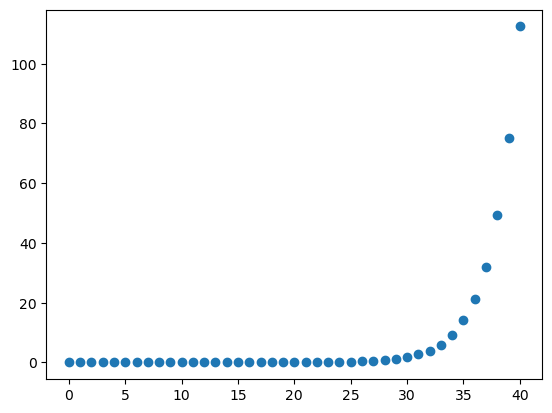

In [20]:
plt.scatter(range(41), lst_time)